<a href="https://colab.research.google.com/github/Adehwam21/animal-disease-prediction/blob/main/Animal_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing necessary libraries**

In [ ]:
!pip install requests seaborn matplotlib pandas


**Getting the dataset**

In [ ]:
from urllib.request import urlretrieve
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/Adehwam21/animal-disease-prediction/main/animal_disease_dataset.csv'
urlretrieve(url, 'animal_disease_dataset.csv')
dataset = pd.read_csv('animal_disease_dataset.csv')
dataset.head(10)

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia
1,buffalo,13,104.5,painless lumps,loss of appetite,depression,lumpy virus
2,sheep,1,100.5,depression,painless lumps,loss of appetite,lumpy virus
3,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg
4,sheep,2,103.6,painless lumps,loss of appetite,depression,pneumonia
5,goat,10,101.2,loss of appetite,blisters on gums,difficulty walking,foot and mouth
6,sheep,6,103.3,loss of appetite,depression,painless lumps,lumpy virus
7,goat,6,101.7,difficulty walking,blisters on tongue,loss of appetite,foot and mouth
8,buffalo,9,102.5,depression,painless lumps,loss of appetite,lumpy virus
9,goat,3,102.7,lameness,blisters on mouth,loss of appetite,foot and mouth


**EXPLORATORY DATA ANALYSIS**

In [ ]:
dataset.shape

(43778, 7)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43778 entries, 0 to 43777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Animal       43778 non-null  object 
 1   Age          43778 non-null  int64  
 2   Temperature  43778 non-null  float64
 3   Symptom 1    43778 non-null  object 
 4   Symptom 2    43778 non-null  object 
 5   Symptom 3    43778 non-null  object 
 6   Disease      43778 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.3+ MB


In [ ]:
dataset.isna().any() #Checking for missing values

Animal         False
Age            False
Temperature    False
Symptom 1      False
Symptom 2      False
Symptom 3      False
Disease        False
dtype: bool

In [ ]:
dataset.duplicated().any()

False

In [ ]:
dataset.describe().T

# Temperature is measured in Fahrenheit

,count,mean,std,min,25%,50%,75%,max
Age,43778.0,6.769131,3.886739,1.0,4.0,7.0,10.0,15.0
Temperature,43778.0,102.269590,1.400872,100.0,101.1,102.2,103.4,105.0


*Visualizing the dataset*

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<Axes: xlabel='Age', ylabel='count'>

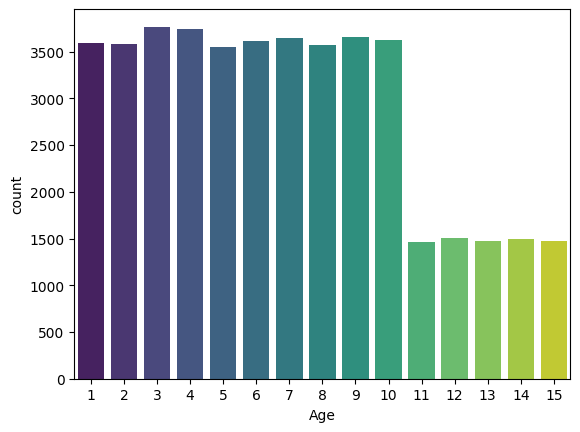

In [ ]:
sns.countplot(x= 'Age', data=dataset, palette='viridis')

<Axes: xlabel='Animal', ylabel='count'>

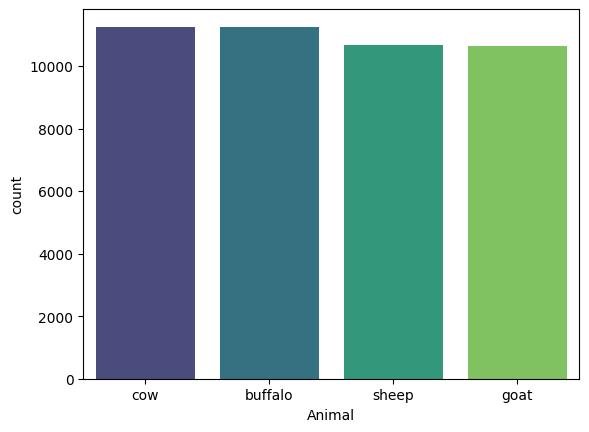

In [ ]:
sns.countplot(x= 'Animal', data=dataset, palette='viridis')

<Axes: xlabel='Disease', ylabel='count'>

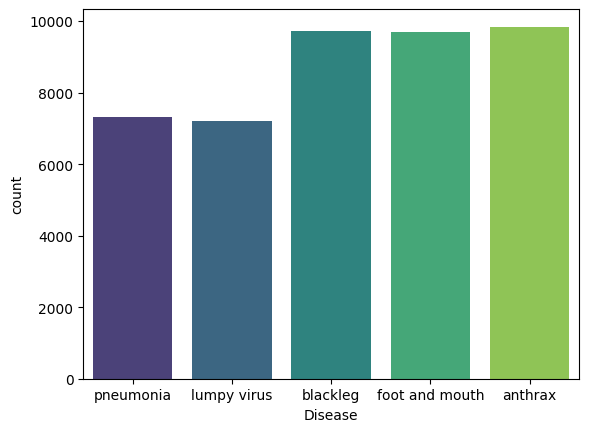

In [ ]:
sns.countplot(x= 'Disease', data=dataset, palette='viridis')

<Axes: xlabel='Disease', ylabel='Age'>

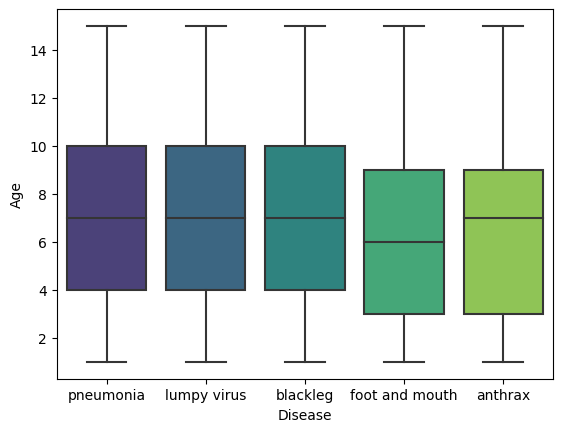

In [ ]:
sns.boxplot(x="Disease", y="Age", data=dataset, palette="viridis")

<Axes: xlabel='Disease', ylabel='Temperature'>

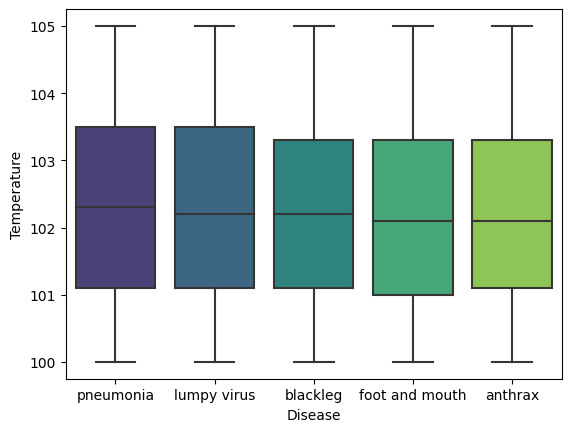

In [ ]:
sns.boxplot(x="Disease", y="Temperature", data=dataset, palette="viridis")

**FEATURE ENGINEERING**

In [ ]:
dataset

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia
1,buffalo,13,104.5,painless lumps,loss of appetite,depression,lumpy virus
2,sheep,1,100.5,depression,painless lumps,loss of appetite,lumpy virus
3,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg
4,sheep,2,103.6,painless lumps,loss of appetite,depression,pneumonia
...,...,...,...,...,...,...,...
43773,goat,9,102.2,swelling in muscle,lameness,crackling sound,blackleg
43774,buffalo,3,101.8,loss of appetite,sores on mouth,difficulty walking,foot and mouth
43775,buffalo,15,104.1,swelling in extremities,chills,shortness of breath,anthrax
43776,cow,9,104.9,crackling sound,lameness,swelling in muscle,blackleg


In [ ]:
all_animals = dataset['Animal'].unique()
print(f'{all_animals} \n number of animals = {len(all_animals)}')

['cow' 'buffalo' 'sheep' 'goat'] 
 number of animals = 4


In [ ]:
all_disease = dataset['Disease'].unique()
print(f'{all_disease}\n number of diseases = {len(all_disease)}')

['pneumonia' 'lumpy virus' 'blackleg' 'foot and mouth' 'anthrax']
 number of diseases = 5


In [ ]:
def unique_symptoms():
    symptom_features = ['Symptom 1','Symptom 2','Symptom 3']
    for i in symptom_features:
        symptoms = dataset[i].unique()
        print(f' {i} = {np.sort(symptoms)}\n\n Total = {len(symptoms)} \n')


unique_symptoms()

def are_symptoms_same():
    Symptop_1 = np.sort(dataset['Symptom 1'].unique())
    Symptop_2 = np.sort(dataset['Symptom 2'].unique())
    Symptop_3 = np.sort(dataset['Symptom 3'].unique())
    print("Are equal?")
    return np.array_equal(Symptop_1,Symptop_2) and np.array_equal(Symptop_1,Symptop_3)

are_symptoms_same()

 Symptom 1 = ['blisters on gums' 'blisters on hooves' 'blisters on mouth'
 'blisters on tongue' 'chest discomfort' 'chills' 'crackling sound'
 'depression' 'difficulty walking' 'fatigue' 'lameness' 'loss of appetite'
 'painless lumps' 'shortness of breath' 'sores on gums' 'sores on hooves'
 'sores on mouth' 'sores on tongue' 'sweats' 'swelling in abdomen'
 'swelling in extremities' 'swelling in limb' 'swelling in muscle'
 'swelling in neck']

 Total = 24 

 Symptom 2 = ['blisters on gums' 'blisters on hooves' 'blisters on mouth'
 'blisters on tongue' 'chest discomfort' 'chills' 'crackling sound'
 'depression' 'difficulty walking' 'fatigue' 'lameness' 'loss of appetite'
 'painless lumps' 'shortness of breath' 'sores on gums' 'sores on hooves'
 'sores on mouth' 'sores on tongue' 'sweats' 'swelling in abdomen'
 'swelling in extremities' 'swelling in limb' 'swelling in muscle'
 'swelling in neck']

 Total = 24 

 Symptom 3 = ['blisters on gums' 'blisters on hooves' 'blisters on mouth'
 'bl

True

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
label_encoder = LabelEncoder()
encoder = OneHotEncoder(sparse_output=False)
scaler = MinMaxScaler()

In [ ]:
columns_to_scale = ['Age', 'Temperature']
column_to_label_encode = 'Disease'
new_dataset = dataset.copy()

In [ ]:
#Scaling numerical columns
new_dataset[columns_to_scale] = scaler.fit_transform(new_dataset[columns_to_scale])
new_dataset

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,0.142857,0.62,depression,painless lumps,loss of appetite,pneumonia
1,buffalo,0.857143,0.90,painless lumps,loss of appetite,depression,lumpy virus
2,sheep,0.000000,0.10,depression,painless lumps,loss of appetite,lumpy virus
3,cow,0.928571,0.06,loss of appetite,swelling in limb,crackling sound,blackleg
4,sheep,0.071429,0.72,painless lumps,loss of appetite,depression,pneumonia
...,...,...,...,...,...,...,...
43773,goat,0.571429,0.44,swelling in muscle,lameness,crackling sound,blackleg
43774,buffalo,0.142857,0.36,loss of appetite,sores on mouth,difficulty walking,foot and mouth
43775,buffalo,1.000000,0.82,swelling in extremities,chills,shortness of breath,anthrax
43776,cow,0.571429,0.98,crackling sound,lameness,swelling in muscle,blackleg


In [ ]:
# # Label Encoding Target column
# new_dataset[column_to_label_encode] = label_encoder.fit_transform(new_dataset[column_to_label_encode])
# new_dataset

In [ ]:
#Splitting the dataset
train_df = new_dataset.drop('Disease', axis=1)
target= new_dataset['Disease']

train_df, test_df, train_target, test_target = train_test_split(train_df, target, test_size=0.2, random_state=42)
print(train_df.shape)
print(train_target.shape)
print(test_df.shape)
print(test_target.shape)

(35022, 6)
(35022,)
(8756, 6)
(8756,)


In [ ]:
# Encoding categorical columns
categorical_columns = train_df.select_dtypes('object').columns.tolist()
categorical_columns

['Animal', 'Symptom 1', 'Symptom 2', 'Symptom 3']

In [ ]:
new_dataset2 = new_dataset[categorical_columns]
encoder.fit(new_dataset2)

OneHotEncoder(sparse_output=False)

In [ ]:
encoded_columns = list(encoder.get_feature_names_out(categorical_columns))
print(encoded_columns)

['Animal_buffalo', 'Animal_cow', 'Animal_goat', 'Animal_sheep', 'Symptom 1_blisters on gums', 'Symptom 1_blisters on hooves', 'Symptom 1_blisters on mouth', 'Symptom 1_blisters on tongue', 'Symptom 1_chest discomfort', 'Symptom 1_chills', 'Symptom 1_crackling sound', 'Symptom 1_depression', 'Symptom 1_difficulty walking', 'Symptom 1_fatigue', 'Symptom 1_lameness', 'Symptom 1_loss of appetite', 'Symptom 1_painless lumps', 'Symptom 1_shortness of breath', 'Symptom 1_sores on gums', 'Symptom 1_sores on hooves', 'Symptom 1_sores on mouth', 'Symptom 1_sores on tongue', 'Symptom 1_sweats', 'Symptom 1_swelling in abdomen', 'Symptom 1_swelling in extremities', 'Symptom 1_swelling in limb', 'Symptom 1_swelling in muscle', 'Symptom 1_swelling in neck', 'Symptom 2_blisters on gums', 'Symptom 2_blisters on hooves', 'Symptom 2_blisters on mouth', 'Symptom 2_blisters on tongue', 'Symptom 2_chest discomfort', 'Symptom 2_chills', 'Symptom 2_crackling sound', 'Symptom 2_depression', 'Symptom 2_difficul

In [ ]:
train_df[encoded_columns] = encoder.transform(train_df[categorical_columns])
test_df[encoded_columns] = encoder.transform(test_df[categorical_columns])

train_df.drop(columns=['Animal', 'Symptom 1', 'Symptom 2', 'Symptom 3'], inplace=True)
test_df.drop(columns=['Animal', 'Symptom 1', 'Symptom 2', 'Symptom 3'], inplace=True)

X_train = train_df
X_test = test_df
y_train = train_target
y_test = test_target


**BUILDING THE MODEL**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#Random forest
%%time
RForest = RandomForestClassifier(random_state= 42)
RForest.fit(X_train, y_train)
y_pred = RForest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 77.54682503426223
CPU times: user 4.5 s, sys: 30.9 ms, total: 4.53 s
Wall time: 4.59 s


In [ ]:
#XGBoster
%%time
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

ValueError: ignored

In [ ]:
#Logistic Regression
%%time
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 83.24577432617633
CPU times: user 9.99 s, sys: 3.41 s, total: 13.4 s
Wall time: 10.9 s


In [ ]:
#Support Vector Classifier
%%time
svc = SVC()
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 83.2571950662403
CPU times: user 56.7 s, sys: 219 ms, total: 57 s
Wall time: 1min 5s


**CREATING AN INTERACTIVE ANIMAL DISEASE PREDICTOR**

In [ ]:
def greet():
  supported_animals = ['cow', 'buffalo', 'sheep', 'goat']
  supported_symptoms = ['blisters on gums', 'blisters on hooves', 'blisters on mouth',
 'blisters on tongue', 'chest discomfort', 'chills', 'crackling sound',
 'depression', 'difficulty walking', 'fatigue', 'lameness', 'loss of appetite',
 'painless lumps', 'shortness of breath', 'sores on gums', 'sores on hooves',
 'sores on mouth', 'sores on tongue', 'sweats', 'swelling in abdomen',
 'swelling in extremities', 'swelling in limb', 'swelling in muscle',
 'swelling in neck']
  print("Hello welcome to our ML powered animal disease predictor program. Please take note:")
  print(f"Animals we support:{supported_animals}\n\nSupported symptoms{supported_symptoms}")

def collect_data():
  animal = input("Type of animal: ")
  age = float(input("How old is the animal: "))
  temperature = float(input('Animal\'s temperature: '))
  symptom1 = input("First symptom: ")
  symptom2 = input("Second symptom: ")
  symptom3 = input("Third symptom: ")
  return [animal, age, temperature, symptom1, symptom2, symptom3]


def format_data(data: list):

  data = {
      'Animal': data[0],
      'Age': data[1],
      'Temperature': data[2],
      'Symptom 1': data[3],
      'Symptom 2': data[4],
      'Symptom 3': data[5]
      }
  return data


def predict_disease(input_data, model):
  numerical_col = ['Age', 'Temperature']
  categorical_col = ['Animal', 'Symptom 1', 'Symptom 2', 'Symptom 3']
  input_df = pd.DataFrame(input_data, index=[0])
  input_df[numerical_col] = scaler.transform(input_df[numerical_col])
  input_df[encoded_columns] = encoder.transform(input_df[categorical_columns])
  input_df.drop(columns=categorical_col, inplace=True)

  prediction = model.predict(input_df)[0]
  probability = model.predict_proba(input_df)[0][list(model.classes_).index(prediction)]
  print(f"Prediction: {prediction}, Probability: {round((probability *100 ),2)}%")


greet()
collect_data = collect_data()
animal_data = format_data(collect_data)
predict_disease(animal_data, RForest)


Hello welcome to our ML powered animal disease predictor program. Please take note:
Animals we support:['cow', 'buffalo', 'sheep', 'goat']

Supported symptoms['blisters on gums', 'blisters on hooves', 'blisters on mouth', 'blisters on tongue', 'chest discomfort', 'chills', 'crackling sound', 'depression', 'difficulty walking', 'fatigue', 'lameness', 'loss of appetite', 'painless lumps', 'shortness of breath', 'sores on gums', 'sores on hooves', 'sores on mouth', 'sores on tongue', 'sweats', 'swelling in abdomen', 'swelling in extremities', 'swelling in limb', 'swelling in muscle', 'swelling in neck']
Type of animal: sheep
How old is the animal: 2
Animal's temperature: 112
First symptom: lameness
Second symptom: depression
Third symptom: fatigue
Prediction: blackleg, Probability: 62%
